### Import libraries:
- pandas
- scikit-learn (train_test_split)
- numpy
- matplotlib
- sklearn.linear_model import Linear Regression
- seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Step 1 - Load the Dataset:
- Dataset being used is ENB2012 Energy Efficiency Dataset

In [5]:
df = pd.read_csv('/Users/harmonyedgley/Downloads/ENB2012_data(1).csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


### Step 2 - Define features (X) and target (y)
- Choose one target (Heating Load - Y1)
- Everything else = features (X1, X2, X3, X4, X5, X6, X7, X8)


In [11]:
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
X = df.loc[:, features]
y = df.loc[:, 'Y1']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### Step 3 - Eliminate NaNs 
- Importance: scikit-learn LinearRegression cannot train if any feature in X has NaNs

In [15]:
X.isna().sum()

X1    528
X2    528
X3    528
X4    528
X5    528
X6    528
X7    528
X8    528
dtype: int64

In [16]:
X.isna().any()

X1    True
X2    True
X3    True
X4    True
X5    True
X6    True
X7    True
X8    True
dtype: bool

In [25]:
data = df[features + ['Y1']].copy()
data = data.dropna(subset=['Y1'])

In [26]:
X = data[features]
y = data['Y1']

In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

### Step 4 - Train/Test Split
- Learn how to use train_test_split
- Understand test size

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size = 0.20, random_state = 42)

### Step 5 - Train Linear Regression Model
- Fit the model
- Make predictions 

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Step 6 - Make Predictions 
- Predict on test data

In [30]:
y_pred = model.predict(X_test)

### Step 7 - Evaluate Model
- R2 score
- Mean Squared Error (MSE)
- What "good" vs "bad" means

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
r2

0.9121840951546912

In [33]:
mse = mean_squared_error(y_test, y_pred)
mse

9.153187855202733

### Step 8 - Visualization 
- Using matplotlib + seaborn 

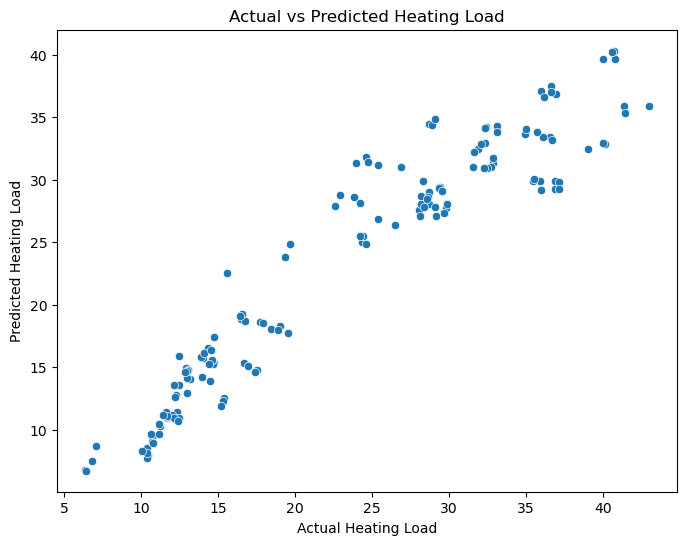

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)

plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted Heating Load")

plt.show()

### Actual vs Predicted Heating Load

This scatter plot compares the model's predicted heating load values against the actual values from the test set. Most points follow a clear diagonal trend, indicating that the linear regression model generalizes well to unseen data. Some variance is present at higher heating load values, suggesting minor prediction error in those cases.